In [37]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('insurance.csv')
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [3]:
df.shape

(1338, 7)

In [4]:
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#convert category to numeric
df['sex'] =df['sex'].map({'female':0,'male':1})
df['smoker']=df['smoker'].map({'no':0,'yes':1})
df['region']=df['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})

In [8]:
df[:2]

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,0,16884.9240
1,18,1,33.77,1,0,1,1725.5523


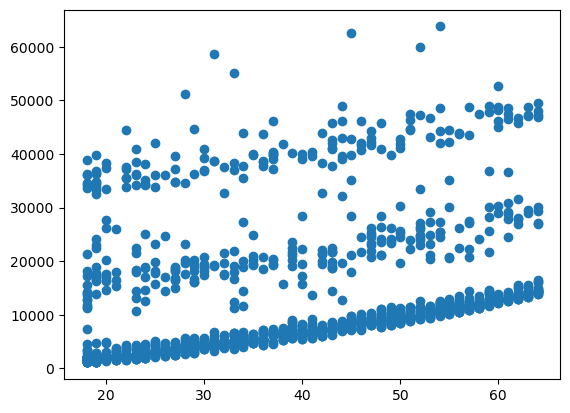

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df.age,df.charges)

<AxesSubplot:>

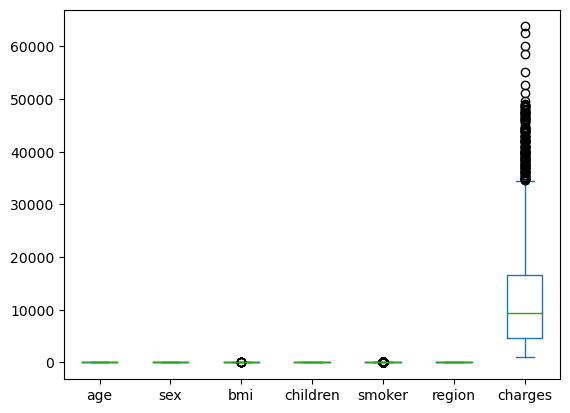

In [11]:
df.plot(kind='box')

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.484305,1.104885,0.0000,1.00000,1.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
from scipy import stats

# Assuming df is your DataFrame
# Create a new DataFrame to store data without outliers
new_df =df.copy()

#define columns containing numerical data
numerical_columns =['age','bmi','children','charges']

#In machine learning, a Z-score is a way to standardize data to a standard scale. 
#It's a statistical measure that can be used to detect and remove outliers. 

#calculate z-scores for numerical columns
z_scores =stats.zscore(df[numerical_columns])

# Define a threshold for outlier detection (e.g., z-score > 3 or < -3)
threshold =3

#find and remove rows with outliers
outlier_indices = (z_scores > threshold).any(axis = 1)
new_df = new_df[~outlier_indices]

#Reset index of the new DataFrame
new_df.reset_index(drop =True,inplace =True)


In [15]:
new_df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,0,16884.9240
1,18,1,33.77,1,0,1,1725.5523


In [16]:
new_df.shape

(1309, 7)

<AxesSubplot:>

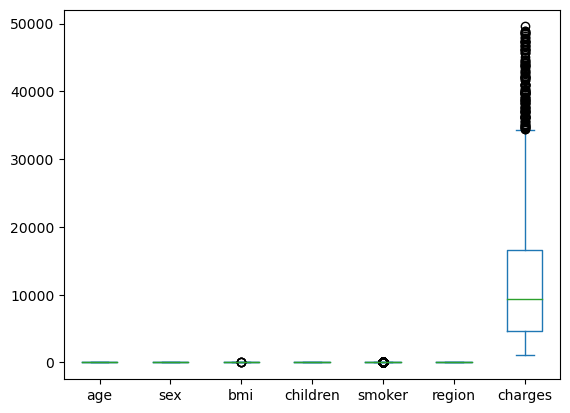

In [17]:
new_df.plot(kind ='box')

In [18]:
#split data
X = new_df.iloc[:,:-1]
X[:2]

,age,sex,bmi,children,smoker,region
0,19,0,27.90,0,1,0
1,18,1,33.77,1,0,1


In [19]:
y=new_df['charges']
y[:2]

0    16884.9240
1     1725.5523
Name: charges, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =.2)

In [23]:
#Create a model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
model.score(X_train,y_train) #check good score of data

0.7532556727313029

In [27]:
#Prediction
y_pred =model.predict(X_test)
y_pred

array([ 8308.9455758 ,  2330.0212412 ,  2206.25909362, 31719.86618287,
       32611.39324942, 12202.03977174,  2806.88171652,  1916.74612697,
        9402.48538045,  3728.29747773,  5230.69814174, 12756.24096362,
       27121.91572063, 15980.86105206,  4334.1776858 , 28869.5496813 ,
       16414.99970704, 11455.51539069, 33655.52825597, 31762.764418  ,
        9434.37700437, 30963.66145638, 10802.12378799,  7512.54505625,
        6938.28912556, 10626.67280257, 34213.81769772,  6178.71619922,
       37600.49262448, 14948.28080545,  9375.69228259, 39388.07766675,
       37595.24964862, 12844.1481667 ,  3510.35296249, 12213.63371253,
       30957.16450287, 34160.31853638, 10957.78694847, 12455.88646886,
        6427.59049302, 11730.96391784, 11651.86015964,  7230.00158368,
        7953.3816531 ,  5339.24076435, 12133.0585674 ,  6301.19204936,
       10075.01250395, 12319.279819  , 10223.51262037,  7801.73777648,
        3464.72718966,  8684.96035731,  4356.19059992, 25972.42966434,
      

In [29]:
y_test.values  #converts series data to array

array([ 4518.82625, 18955.22017,  2395.17155, 22331.5668 , 24520.264  ,
       12638.195  ,  1769.53165,  2352.96845,  5729.0053 ,  1725.5523 ,
        5209.57885, 10594.2257 , 34617.84065, 16455.70785,  4428.88785,
       19719.6947 , 14235.072  ,  8124.4084 , 40974.1649 , 21659.9301 ,
       15828.82173, 21195.818  , 10436.096  ,  5375.038  ,  5910.944  ,
        7639.41745, 41676.0811 ,  7133.9025 , 46599.1084 , 28287.89766,
       10197.7722 , 48970.2476 , 45702.02235, 11187.6567 ,  2639.0429 ,
       28476.73499, 21774.32215, 24915.22085,  5124.1887 ,  9964.06   ,
        4438.2634 ,  5846.9176 , 10264.4421 ,  4922.9159 ,  5246.047  ,
        4415.1588 , 10407.08585,  5152.134  ,  8551.347  , 19144.57652,
        8606.2174 ,  6555.07035,  2789.0574 ,  5979.731  ,  5458.04645,
       15006.57945,  6414.178  ,  5425.02335,  2331.519  ,  6289.7549 ,
        2155.6815 , 43813.8661 , 17560.37975,  1261.442  ,  3659.346  ,
        9630.397  , 40103.89   ,  2690.1138 ,  5976.8311 ,  8026

In [41]:
#Error =actual - Predicted
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

ValueError: continuous is not supported

# Error Measurement: MAE, MSE, RMSE

# Performance measurement :Goodness of model
#r2_score,adjusted_r2_score [0,1]    

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [34]:
#MAE
print('MAE : ',mean_absolute_error(y_test,y_pred))

MAE :  4231.762899593368


In [36]:
#MSE
print('MSE :' ,mean_squared_error(y_test,y_pred))

MSE : 36294372.90811952


In [38]:
#RMSE
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE : 6024.481131858537


In [40]:
#check model performance
r2_score(y_test,y_pred)*100

75.08986670337494

In [43]:
def adjusted_r2_score(y_true,y_pred,n_samples,n_features):
    #from sklearn.metrics import r2_score
    
    #calculate R-squared
    r2= r2_score(y_true,y_pred)
    
    #Calculate adjusted R-squared
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))

    return adjusted_r2

# Assuming y_test contains the true target values and y_pred contains the predicted target values
# Calculate the number of samples and features

n_samples=len(y_test)
n_features =X_test.shape[1] #assume X_test is feature matrix

#Calculate adjusted r squared score
adjusted_r2= adjusted_r2_score(y_test,y_pred,n_samples,n_features)

print("Adjusted R-squared score :" ,adjusted_r2)

Adjusted R-squared score : 0.7450374591992495
